## El siguiente cuarderno contempla el proyecto de predicción de ventas del proyecto del bootcamp de unilever

## Descripción de cada columnas

* **Item_Identifier:**: ID unico del producto
* **Item_Weight:** Peso del productp
* **Item_Fat_Content:** Si el producto es bajo en grasa o no
* **Item_Visibility:** Porcentaje del area de exhibición total de todos los produtos
* **Item_Type:** Categoria del producto
* **Item_MRP:** Precio de venta maximo del producto
* **Outlet_Identifier:** ID tienda unico
* **Outlet_Establishment_Year:** Año de la tienda
* **Outlet_Size:** Tamaño de la tienda
* **Outlet_Location_Type:** Tipo de ciudad en la que se encuentra
* **Outlet_Type:** Dos variable, type 1 es solo comestible y type 2 es algun tipo de supermercado
* **Item_Outlet_Sales:** Ventas del producto


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
import seaborn as sbn
import sys

print ("Pandas", pd.__version__)
print ("Numpy", np.__version__)
print ("altair", alt.__version__)
print ("sbn", sbn.__version__)
print ("Python", sys.version[:6])

Pandas 1.3.4
Numpy 1.20.3
altair 4.2.0
sbn 0.11.2
Python 3.9.7 


## Cargo el documento

In [35]:
df=pd.read_csv("C:/Users/Cristofer/Bootcamp_python/Semana_2/sales_predictions.csv")
print ("El archivo tiene",df.shape[0],"filas, y ",df.shape[1],"columnas")
df2=df ## Copia del archivo
df.head(5)

El archivo tiene 8523 filas, y  12 columnas


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Verifico el tipo de datos y valores nulos

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Descripción de los datos

In [49]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Veo columnas con valores nulos

In [37]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Analizo el comportamiento de los datos en variable numerica

<AxesSubplot:ylabel='Frequency'>

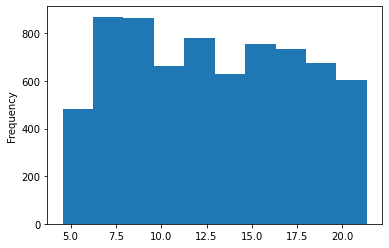

In [38]:
df["Item_Weight"].plot.hist()

## Complemento los valores nulos con la media

In [39]:
df["Item_Weight"].fillna(df["Item_Weight"].median(), inplace=True)

## Los valores se modifican demasiado

<AxesSubplot:ylabel='Frequency'>

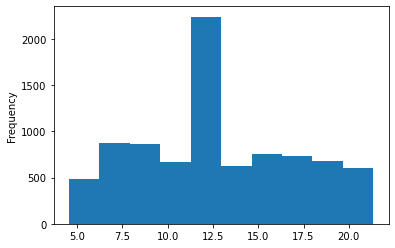

In [40]:
df["Item_Weight"].plot.hist()

## Analizo la variable categoriza 

In [41]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

## Transformo de variable categorica a numerica

In [42]:
df["Outlet_Size2"]=""
df["Outlet_Size2"][df["Outlet_Size"]=="Small"]=1;
df["Outlet_Size2"][df["Outlet_Size"]=="Medium"]=2;
df["Outlet_Size2"][df["Outlet_Size"]=="High"]=3;

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_3808/781719540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size2"][df["Outlet_Size"]=="Small"]=1;
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_3808/781719540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size2"][df["Outlet_Size"]=="Medium"]=2;
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_3808/781719540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

### Inspecciono si hay alguna relación con otra columnas

**CONCLUSIÓN**  
**No hay ninguna relación clara, a traves de correlación metodo pearson**
##### Elimino los nulos en esta columnas

In [47]:
df_sinnulos=df.dropna()#.corr()
df_sinnulos["Outlet_Size2"]=df_sinnulos["Outlet_Size2"].astype(int)
df_sinnulos.corr()  

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_3808/3585537563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinnulos["Outlet_Size2"]=df_sinnulos["Outlet_Size2"].astype(int)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size2
Item_Weight,1.000000,-0.012174,0.029555,0.013695,0.006605,0.014268
Item_Visibility,-0.012174,1.000000,-0.000651,-0.087452,-0.105854,-0.096773
Item_MRP,0.029555,-0.000651,1.000000,0.011632,0.588939,-0.005827
Outlet_Establishment_Year,0.013695,-0.087452,0.011632,1.000000,-0.057850,-0.298431
Item_Outlet_Sales,0.006605,-0.105854,0.588939,-0.057850,1.000000,0.129076
Outlet_Size2,0.014268,-0.096773,-0.005827,-0.298431,0.129076,1.000000


In [48]:
df.dropna(subset=["Outlet_Size"])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size2
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,3
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360,1
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,3
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,2


### Como se cambia el comportamiento de los datos por variables numerica, es mejor eliminar las filas con valores nulos

In [29]:
df2.dropna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Parte 3: Visualización

### Visualización de la distribución de los pesos y visibilidad de los productos

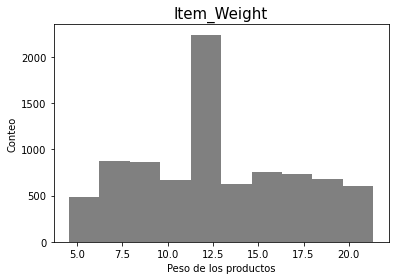

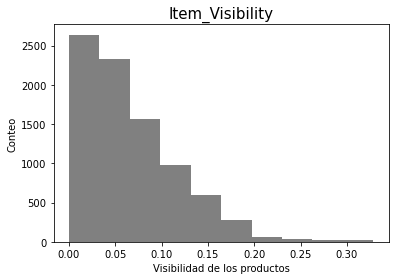

In [66]:
lista=["Item_Weight","Item_Visibility"]
lista2=["Peso de los productos","Visibilidad de los productos"]
for i in range(len(lista)):
    plt.hist(df[lista[i]], color="grey")
    plt.title(lista[i], fontsize=15)
    plt.ylabel("Conteo", fontsize=10)
    plt.xlabel(lista2[i],fontsize=10)
  
    plt.show()

## Distribución de los productos por grasa

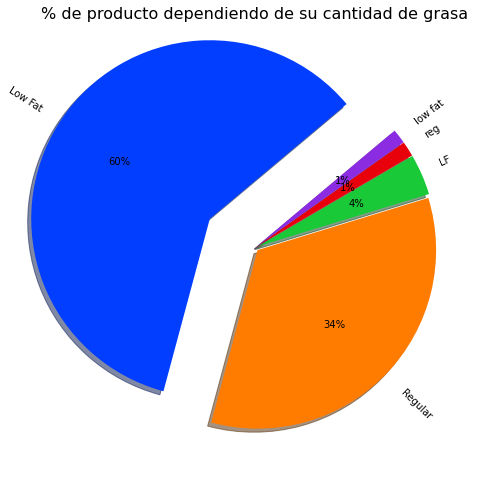

In [90]:
circular=pd.DataFrame(df["Item_Fat_Content"].value_counts())
colors = sbn.color_palette('bright')
explode = [0.3,0.02,0.02,0.02,0.02]
plt.figure(figsize=[8,12])
plt.pie(circular["Item_Fat_Content"], colors = colors, autopct = '%0.0f%%',explode = explode, labels=list(circular.index)
        ,shadow = 'True',rotatelabels = 'true',center = (0.1,0.4),startangle=40)
plt.title("% de producto dependiendo de su cantidad de grasa", fontsize=16)
plt.show()

## Descripción de cada columnas

* **Item_Identifier:**: ID unico del producto
* **Item_Weight:** Peso del productp
* **Item_Fat_Content:** Si el producto es bajo en grasa o no
* **Item_Visibility:** Porcentaje del area de exhibición total de todos los produtos
* **Item_Type:** Categoria del producto
* **Item_MRP:** Precio de venta maximo del producto
* **Outlet_Identifier:** ID tienda unico
* **Outlet_Establishment_Year:** Año de la tienda
* **Outlet_Size:** Tamaño de la tienda
* **Outlet_Location_Type:** Tipo de ciudad en la que se encuentra
* **Outlet_Type:** Dos variable, type 1 es solo comestible y type 2 es algun tipo de supermercado
* **Item_Outlet_Sales:** Ventas del producto


## Cantidad de empresas por año y tamaño de tienda

In [112]:
barras=pd.DataFrame(df.groupby(["Outlet_Identifier"])["Item_Outlet_Sales"].sum())
barras

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


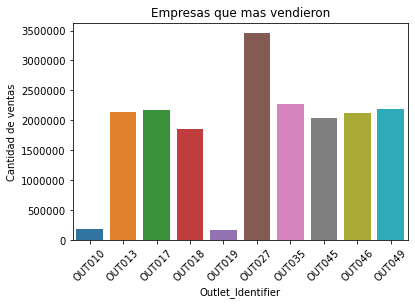

In [127]:
sbn.barplot(y=barras["Item_Outlet_Sales"],x=barras.index)
plt.xticks(rotation=45);
plt.title("Empresas que mas vendieron")
plt.ylabel("Cantidad de ventas")
plt.ticklabel_format(axis='y',useOffset=False, style="plain")